Отчет по лабораторной работе "Собственные примеры - многофакторные зависимости"

Выполнил студент группы РНМ-21-02 Зиязиев И.С.

In [6]:
#импортирую библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
#импортирую данные
df = pd.read_csv('https://d3c33hcgiwev3.cloudfront.net/_1fbbe0f3404552777e1932b2a209e803_bikes_rent.csv?Expires=1640995200&Signature=LcR5mYhdMGMXN2dfDpJavt5djXqyP-D7eRBLctcjLiGuJ7BjCwZDwjB3UwmVwzSHV-2q9sBe9puH5PpUrKdgJXuDcMBcjymB2Cvzxses1Pb60FwtfxmTjA9vWWdMqekG9nqIvCPOS1y-~FEVZYFdW18mAMh7w7m5sm05V0PHeFI_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')


In [8]:
#так выглядят данные
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Описание всех полей:
* _season_: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в Цельсиях
* _atemp_: температура по ощущениям в Цельсиях
* _hum_: влажность
* _windspeed(mph)_: скорость ветра в милях в час
* _windspeed(ms)_: скорость ветра в метрах в секунду
* _cnt_: количество арендованных велосипедов - целевой признак

В данной таблице у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок. 

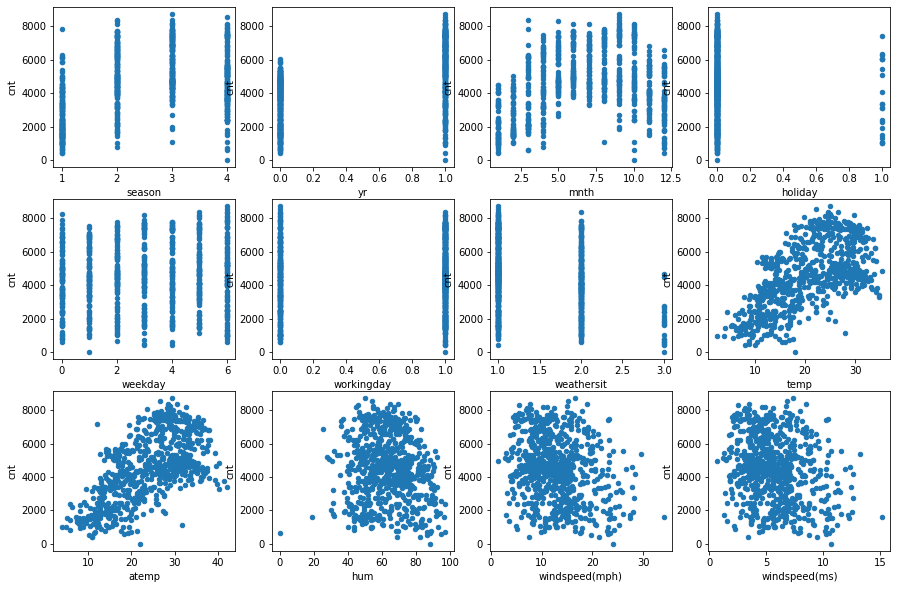

In [9]:
#Посмотрим на графиках, как целевой признак (количество арендованных велосипедов) зависит от остальных
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Как видно по графикам, температура и температура по ощущениям - линейно зависимые признаки, от одного из них можно избавиться

In [10]:
#Посчитаем корреляции всех признаков
feature_cols = ['season',	'yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit',	'temp',	'atemp',	'hum',	'windspeed(mph)',	'windspeed(ms)']
target_col = ['cnt']

df[feature_cols].corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


In [11]:
df[feature_cols].corrwith(df['cnt'])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.

По графикам видно, что некоторые признаки похожи друг на друга. 
Поэтому нужно еще посчитать корреляции между вещественными признаками.

In [12]:
#Посчитаем попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


В матрице имеются две пары сильно коррелирующих столбцов: temp и atemp (коррелируют по своей природе) и два windspeed (потому что это просто перевод одних единиц в другие)

Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

In [13]:
# Код 1.3 (0.5 балла)
# Выведите средние признаков
df.mean(axis=0)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Проведем стандартизацию признаков

In [14]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [15]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Создаём объект линейного регрессора, обучите его на всех данных и выведите веса модели 

lin_model = LinearRegression()
lin_model.fit(X, y)
list(zip(feature_cols, lin_model.coef_))

[('season', 570.8675887934525),
 ('yr', 1021.9652921309369),
 ('mnth', -141.30438378580345),
 ('holiday', -86.75613647415624),
 ('weekday', 137.22482362623418),
 ('workingday', 56.39056950314733),
 ('weathersit', -330.2332887484121),
 ('temp', 367.47338726750786),
 ('atemp', 585.5559979631937),
 ('hum', -145.6063153911189),
 ('windspeed(mph)', 12458200269331.953),
 ('windspeed(ms)', -12458200269530.414)]

Обучаем регрессоры Ridge и Lasso 

In [18]:
from sklearn.linear_model import Lasso, Ridge

In [19]:
# Обучаем линейную модель с L1-регуляризацией
lasso_model = Lasso()
lasso_model.fit(X, y)
list(zip(feature_cols, lasso_model.coef_))

[('season', 560.2416160308869),
 ('yr', 1019.4634940657196),
 ('mnth', -128.73062703678752),
 ('holiday', -86.15278133371116),
 ('weekday', 137.34789390496314),
 ('workingday', 55.212370641356685),
 ('weathersit', -332.3698569623484),
 ('temp', 376.3632362096995),
 ('atemp', 576.5307935045503),
 ('hum', -144.1291550034858),
 ('windspeed(mph)', -197.13968940248557),
 ('windspeed(ms)', -2.8050167469807684e-08)]

In [20]:
# Обучаем линейную модель с L2-регуляризацией 
ridge_model = Ridge()
ridge_model.fit(X, y)
list(zip(feature_cols, ridge_model.coef_))

[('season', 563.0645722520175),
 ('yr', 1018.9483787875301),
 ('mnth', -131.873320282477),
 ('holiday', -86.74609799709219),
 ('weekday', 138.0051111787191),
 ('workingday', 55.90311037506478),
 ('weathersit', -332.34978849907395),
 ('temp', 386.4578891919065),
 ('atemp', 566.3470470600686),
 ('hum', -145.07132729867178),
 ('windspeed(mph)', -99.25944108179063),
 ('windspeed(ms)', -99.25944115434177)]

In [21]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучаем регрессор Lasso
for i, alpha in enumerate(alphas):
  lasso_model = Lasso(alpha)
  lasso_model.fit(X, y)
  coefs_lasso[i] = lasso_model.coef_
  
  ridge_model = Ridge(alpha)
  ridge_model.fit(X, y)
  coefs_ridge[i] = ridge_model.coef_

In [22]:
pd.DataFrame(coefs_lasso)

,0,1,2,3,4,5,6,7,8,9,10,11
0,560.241616,1019.463494,-128.730627,-86.152781,137.347894,55.212371,-332.369857,376.363236,576.530794,-144.129155,-197.139689,-2.805017e-08
1,410.969632,977.019409,-0.000000,-53.448969,91.943437,17.537212,-318.125568,322.829934,610.031512,-91.068962,-145.066095,-2.298729e-08
2,370.077089,935.945490,0.000000,-12.161936,48.888634,0.000000,-308.805664,269.417263,632.502623,-27.504288,-93.774904,-2.416434e-08
3,332.835717,891.870058,0.000000,-0.000000,0.000000,0.000000,-279.616688,211.052030,662.920880,-0.000000,-50.155147,-2.627654e-08
4,298.134448,845.652857,0.000000,-0.000000,0.000000,0.000000,-235.571345,124.144807,725.379483,-0.000000,-12.646177,-2.787741e-08
5,258.927201,799.237273,0.000000,-0.000000,0.000000,0.000000,-190.821549,72.075938,750.363107,-0.000000,-0.000000,-0.000000e+00
6,217.427513,752.720808,0.000000,-0.000000,0.000000,0.000000,-145.713398,37.715365,756.296866,-0.000000,-0.000000,-0.000000e+00
7,175.929845,706.203788,0.000000,-0.000000,0.000000,0.000000,-100.605389,3.660938,761.926337,-0.000000,-0.000000,-0.000000e+00
8,134.628497,659.632535,0.000000,-0.000000,0.000000,0.000000,-55.511063,0.000000,737.348061,-0.000000,-0.000000,-0.000000e+00
9,93.351742,613.054639,0.000000,-0.000000,0.000000,0.000000,-10.418569,0.000000,709.130877,-0.000000,-0.000000,-0.000000e+00


In [23]:
pd.DataFrame(coefs_ridge)

,0,1,2,3,4,5,6,7,8,9,10,11
0,563.064572,1018.948379,-131.873320,-86.746098,138.005111,55.903110,-332.349788,386.457889,566.347047,-145.071327,-99.259441,-99.259441
1,461.178632,954.307742,-41.565450,-84.913470,126.603667,54.251691,-313.275151,458.901477,481.443500,-151.291010,-101.627315,-101.627315
2,403.976530,898.083622,5.674243,-81.911062,117.941411,52.728484,-298.408981,455.289868,467.431417,-152.686051,-102.101671,-102.101671
3,366.604239,848.463465,34.027283,-78.771965,110.680120,51.257192,-286.125159,447.479825,455.754030,-151.483206,-102.005376,-102.005376
4,339.745290,804.251048,52.489873,-75.717408,104.403464,49.841895,-275.486095,438.509689,444.764274,-148.943970,-101.586385,-101.586385
5,319.158641,764.561434,65.152007,-72.819708,98.878804,48.484525,-266.002556,429.214123,434.235235,-145.698115,-100.964711,-100.964711
6,302.636060,728.708540,74.138281,-70.098983,93.955811,47.185338,-257.390629,419.926152,424.121922,-142.089345,-100.208620,-100.208620
7,288.913276,696.145816,80.660457,-67.554852,89.528675,45.943467,-249.471395,410.800184,414.409373,-138.316538,-99.360661,-99.360661
8,277.213216,666.429747,85.459254,-65.178706,85.518667,44.757303,-242.124399,401.911945,405.085853,-134.499038,-98.449064,-98.449064
9,267.031090,639.195368,89.012323,-62.958906,81.864909,43.624770,-235.263997,393.297986,396.138155,-130.709872,-97.493434,-97.493434


Визуализируем динамику весов при увеличении параметра регуляризации:

Text(0.5, 1.0, 'Ridge')

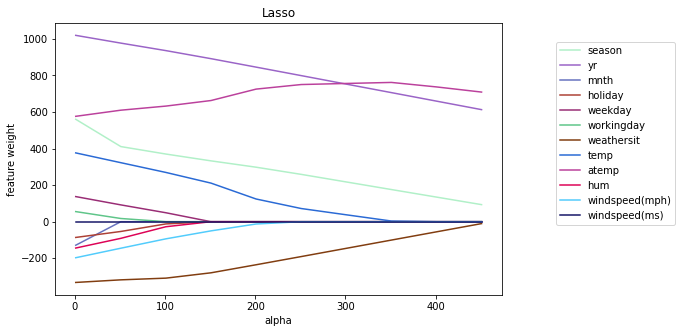

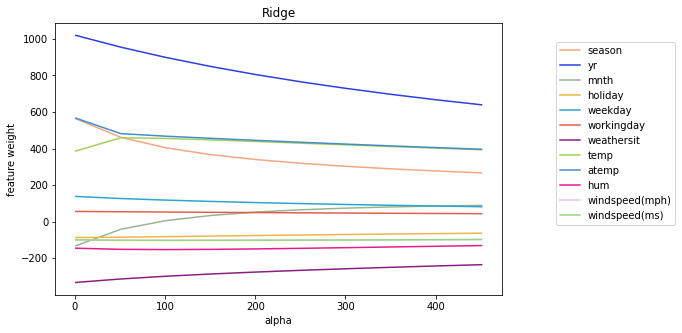

In [24]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Осюда можно сделать несколько выводов:

1. Регуляризатор Lasso агрессивнее уменьшает веса при одном и том же alpha
2. lasso исключает некоторые признаки при больших значениях alpha. Скорее всего он это делает потому, что эти признаки являются неинформативными
3. Лассо исключает один из признаков windspeed, а также при alpha > 200 исключает и второй. Ridge не исключает ни один из признаков при любом значении alpha 


In [25]:
from sklearn.linear_model import LassoCV

In [26]:
# Обучаем регрессор LassoCV на всех параметрах регуляризации из alpha

alphas = np.arange(1, 100, 1)
lasso_cv_model = LassoCV(alphas=alphas, cv=3)
lasso_cv_model.fit(X, y);

In [27]:
lasso_cv_model.alpha_

5

In [28]:
list(zip(feature_cols, lasso_cv_model.coef_))
'windspeed(mph)', 'weathersit', 'hum'

('windspeed(mph)', 'weathersit', 'hum')

In [29]:
MSEs = lasso_cv_model.mse_path_.mean(axis=1)

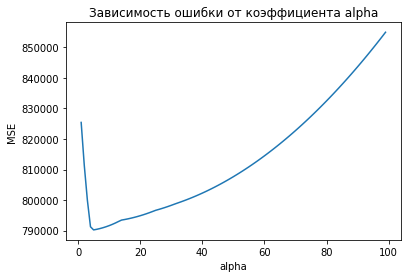

In [30]:
# Построим график усредненного по строкам MSE в зависимости от alpha. 
figure, axes = plt.subplots()
plt.plot(lasso_cv_model.alphas_, MSEs);
plt.title('Зависимость ошибки от коэффициента alpha');
plt.ylabel('MSE');
plt.xlabel('alpha');

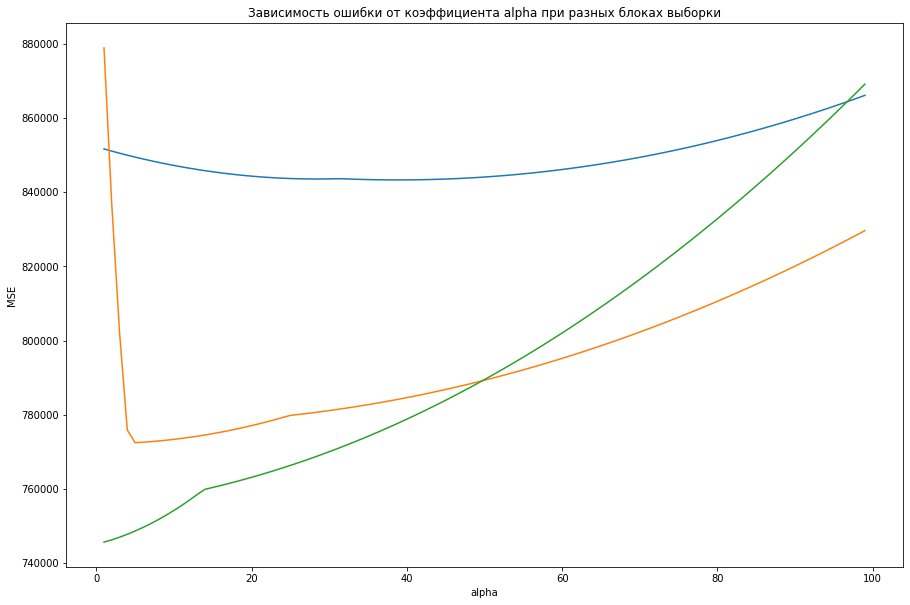

In [31]:
# Выводим значения alpha, соответствующие минимумам MSE на каждом разбиении 
fig, axes = plt.subplots(figsize=(15, 10))
for i, errors in enumerate(lasso_cv_model.mse_path_.T):
    plt.plot(lasso_cv_model.alphas_, errors,)
plt.title('Зависимость ошибки от коэффициента alpha при разных блоках выборки');
plt.ylabel('MSE');
plt.xlabel('alpha');

Отсюда делаем следующие выводы:
1. Возрастающая линейная зависимость видна только на графике с температурой. На графиках с сезонами и годами явно сказать нельзя. Можно логично утверждать, что чем больше температура, то тем больше людей захотят взять велосипеды. 
2. Убывающая линейная зависимость видна на некоторых признаках. Weathersit объясняет погоду, где 1 - хорошая погода, 4 - плохая. Чем больше значение этого признака, тем хуже погодные условия и тем меньше людей захотят взять велосипеды. То же самое можно сказать и про влажность (большая влажность косвенно свидетельствует о дожде), и про скорость ветра.


In [32]:
#признаки с возрастающей линейной зависимостью
df[['season', 'yr', 'atemp', 'temp']].corrwith(df['cnt'])

season    0.406100
yr        0.566710
atemp     0.631066
temp      0.627494
dtype: float64

In [33]:
#признаки с наибольшими по модулю отрицательными коэффициентами
df[['weathersit', 'hum', 'windspeed(mph)']].corrwith(df['cnt'])

weathersit       -0.297391
hum              -0.100659
windspeed(mph)   -0.234545
dtype: float64